<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 1</center></b><h2>
<h3><b><center>Una representación del sistema solar</center></b><h3>
<h5><center><b>Asignada</b>: 9 de Febrero de 2024</center><h5>
<h5><center><b>Entrega</b>: 15 de Febrero de 2024</center><h5>
</p>

<hr/>
<b>Nombre</b>: Mariana Gómez Cuartas
<br/>
<b>Cédula</b>: 1001011072
<br/>
<b>Última actualización</b>: 15/02/2024
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es utilizar lo visto en clase sobre el sistema de información `Horizons`, con su paquete relacionado `astroquery` y el paquete `SPICE` para hacer una representación de las órbitas de los planetas del Sistema Solar, como se muestra abajo:



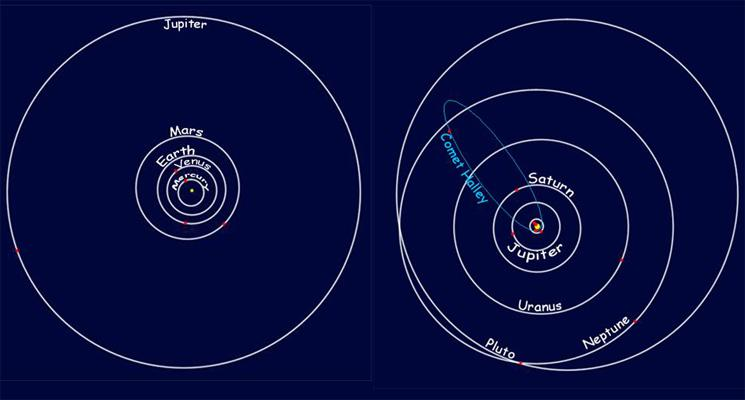


**Procedimiento**:

Para conseguir el objetivo:

1. Consiga, para cada planeta, la masa usando `SPICE` y el período orbital en la [Solar System Dynamics](https://ssd.jpl.nasa.gov/) del JPL.

2. Obtenga las posiciones en el espacio de los planetas empezando en la fecha de su nacimiento y hasta que cada planeta complete una órbita alrededor del Sol. Tome 100 puntos por cada órbita.

3. Haga una gráfica con dos páneles, como muestra el ejemplo de las órbitas de los planetas. En el primer panel gráfique la posición de los planetas hasta Júpiter y en el segundo desde Júpiter hasta Neptuno. Opcionalmente agregue, como se ve en la figura, la órbita del cometa Halley.

4. Calcule para cada planeta, en el punto inicial (fecha de su cumpleaños) la fuerza ejercida por el Sol sobre cada uno de los cuerpos. Compárelas.

5. Calcule, para ese mismo día, la fuerza total ejercida por todos los planetas sobre el Sol (suma).

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - El gráfico de las órbitas de los planetas.

- Datos mínimos:
  - Fuerza del Sol sobre cada planeta en la fecha de su nacimiento.
  - Fuerza neta (suma) de los planetas sobre el Sol en la fecha de su nacimiento.

- Gráficos opcionales:
  - Gráfico de la fuerza del Sol sobre cada planeta como función de la distancia al planeta.
  
- **Atención**: En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

# Solución

In [1]:
!pip install -Uq pymcel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 63.9 MB/s eta 0:00:00


In [2]:
import spiceypy as spy
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons
import plotly.express as px

Paquete pymcel cargado. Versión: 0.5.4


In [3]:
pc.descarga_kernels()    #descargamos los kernells porque vamoa a hacer uso de spice

Creando el directorio con los kernels pymcel//data/...
Descargando kernel 'de430.bsp' en 'pymcel/'...
Hecho.
Descargando kernel 'de430_tech-comments.txt' en 'pymcel/'...
Hecho.
Descargando kernel 'latest_leapseconds.tls' en 'pymcel/'...
Hecho.
Descargando kernel 'naif0012.tls' en 'pymcel/'...
Hecho.
Descargando kernel 'earth_latest_high_prec.bpc' en 'pymcel/'...
Hecho.
Descargando kernel 'earth_fixed.tf' en 'pymcel/'...
Hecho.
Descargando kernel 'gm_de431.tpc' en 'pymcel/'...
Hecho.
Descargando kernel 'pck00011.tpc' en 'pymcel/'...
Hecho.


In [4]:
pc.lista_kernels()      #me dice los kernels que hay disponibles

Para descargar todos los kernels use: pymcel.descarga_kernels(). Para descargar un kernel específico use pymcel.descarga_kernel(<url>)


['pymcel/data/de430_tech-comments.txt',
 'pymcel/data/gm_de431.tpc',
 'pymcel/data/naif0012.tls',
 'pymcel/data/de430.bsp',
 'pymcel/data/pck00011.tpc',
 'pymcel/data/earth_latest_high_prec.bpc',
 'pymcel/data/earth_fixed.tf',
 'pymcel/data/latest_leapseconds.tls']

In [5]:
spy.furnsh([                                         #miro que base de dato voy a usar
    'pymcel/data/de430.bsp',
    'pymcel/data/gm_de431.tpc',
    'pymcel/data/latest_leapseconds.tls'
    ])

##1. Consiga, para cada planeta, la masa usando `SPICE` y el período orbital en la [Solar System Dynamics](https://ssd.jpl.nasa.gov/) del JPL.

Comenzamos recordando que Spice maneja unidades de km, mientras que pymcel arroja el resultado en unidades del SI, por lo cual ponemos especial cuidado en el tratamiento de las unidades.

In [6]:
ref_planetas = ['199', '299','399', '499', '599', '699', '799', '899', '999']
refff_planetas = ['199', '299','399', '499', '599', '699', '799', '899', '999']

G = pc.constantes.G / (1e9)          #[G] = N km^3 / kg^2

def M_planeta(ref_planetas):
  n, valor = spy.bodvrd(ref_planetas, 'GM', 1)
  GM_planeta = valor[0]
  M_planeta = GM_planeta / G
  return M_planeta

masa_planetas = [M_planeta(planeta) for planeta in refff_planetas]
planetas= ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno', 'Plutón']
masa_planetas

[3.30098736946197e+23,
 4.867305814842006e+24,
 5.972168398724899e+24,
 6.416908682663215e+23,
 1.8981246710786271e+27,
 5.683173890692994e+26,
 8.680987253013814e+25,
 1.0240923396370666e+26,
 1.302928873081634e+22]

Hacemos uso de chat gpt para la explicacion de una funcion que facilmente me permita unir masa_planetas y planetas como un diccionario.

Lo que hace la funcion zip es agrupar los elementos de las listas en tuplas de a dos: el primero con el primero ,......

In [7]:
masas_kg = dict(zip(planetas, masa_planetas))
masas_kg, masas_kg['Venus']            #las masas en kg

({'Mercurio': 3.30098736946197e+23,
  'Venus': 4.867305814842006e+24,
  'Tierra': 5.972168398724899e+24,
  'Marte': 6.416908682663215e+23,
  'Júpiter': 1.8981246710786271e+27,
  'Saturno': 5.683173890692994e+26,
  'Urano': 8.680987253013814e+25,
  'Neptuno': 1.0240923396370666e+26,
  'Plutón': 1.302928873081634e+22},
 4.867305814842006e+24)

Ahora, vamos a tomar el periodo orbital de cada uno de los planetas en el solar system dynamics del JPL

De la página indicada puede tomarse siguiendo la siguiente ruta, para obtener el resultado en años:

Home / Planets / Planetary Physical Parameters


El tiempo sideral orbital del cometa halley en años se toma de [aquí](https://www.spacereference.org/comet/1p-halley).

Importante tener en cuenta que el periodo en esta sección se expresa en años, por el subínidce a

In [8]:
periodos_orbitales = [0.2408467, 0.61519726, 1.0000174, 1.8808476, 11.862615, 29.447498, 84.016846, 164.79132, 247.92065]
periodo_a = dict(zip(planetas, periodos_orbitales))
periodo_a, periodo_a['Mercurio']

({'Mercurio': 0.2408467,
  'Venus': 0.61519726,
  'Tierra': 1.0000174,
  'Marte': 1.8808476,
  'Júpiter': 11.862615,
  'Saturno': 29.447498,
  'Urano': 84.016846,
  'Neptuno': 164.79132,
  'Plutón': 247.92065},
 0.2408467)

Consideramos que un año tiene aproximadamente 365.25 días para expresar el periodo de cada uno en días

In [9]:
periodos_dias = [i * 365.25 for i in periodos_orbitales]
periodo_d = dict(zip(planetas, periodos_dias))
periodo_d, periodo_d['Mercurio']

({'Mercurio': 87.969257175,
  'Venus': 224.700799215,
  'Tierra': 365.25635535,
  'Marte': 686.9795859000001,
  'Júpiter': 4332.82012875,
  'Saturno': 10755.6986445,
  'Urano': 30687.1530015,
  'Neptuno': 60190.029630000005,
  'Plutón': 90553.0174125},
 87.969257175)

##2. Obtenga las posiciones en el espacio de los planetas empezando en la fecha de su nacimiento y hasta que cada planeta complete una órbita alrededor del Sol. Tome 100 puntos por cada órbita.

Comenzamos por convertir la fecha de nacimiento a ET

In [10]:
fecha_nacimiento= '2003-01-24 13:05:00'
et_0 = spy.utc2et(fecha_nacimiento)        #convertir la fecha de nacimiento al tiempo dinámico
jd_0= spy.unitim(et_0, 'ET', 'JDTDB')      #convertir el tiempo dinámico o ephemeris time en dia juliano
jd_0

2452664.045881766

En la siguiente celda se encuentra una función llamada posiciones, en la cual creamos dos elemenos diferentes de astroquery, llamados consulta_1 y consulta_2.

La necesidad de hacerlo de esta forma radica en la cantidad de elementos que se ingresa en el arreglo de días julianos que recibe epochs, pues al hacerlo directamente con 100 arroja un error en html, mencionando que se trata de un proceso largo.

Se encontró la solución al problema dividiendolo la cantidad de elementos a evaluar en dos, para unirlo al momento de entregar el resultado final.

La función retorna una tupla con las posiciones x, y, z del cuerpo que sea ingresado a la función, presentando su referencia y su respectivo periodo.

In [11]:
def  posiciones(ref, periodo_en_dias):
  '''ingrese la referencia del objeto de estudio, y el periodo orbital del mismo'''

  consulta_1= Horizons(                                       #creamos el objeto asociado a la consulta
      id= ref,
      location='@SSB',                                                   #medimos con respecto al baricentro del sistema solar
      epochs= np.linspace(jd_0, jd_0 + (periodo_en_dias/2), 50)
  )

  consulta_2= Horizons(
      id= ref,
      location='@SSB',
      epochs= np.linspace(jd_0 + (periodo_en_dias/2), jd_0 + periodo_en_dias, 50)
  )

  tabla_1 = consulta_1.vectors().to_pandas()                    #creamos la tabla que nos da los vectores asociados
  tabla_2 = consulta_2.vectors().to_pandas()

  x= list(tabla_1.x) + list(tabla_2.x)
  y= list(tabla_1.y) + list(tabla_2.y)
  z= list(tabla_1.z) + list(tabla_2.z)
  pos= (x,y,z)                                                  #importante tener en cuenta que las posiciones salen en unidades astronomicas

  return pos

Recordamos los elementos que hasta el momento tenemos y que necesitamos para la funcion anterior

In [12]:
ref_planetas, periodo_d

(['199', '299', '399', '499', '599', '699', '799', '899', '999'],
 {'Mercurio': 87.969257175,
  'Venus': 224.700799215,
  'Tierra': 365.25635535,
  'Marte': 686.9795859000001,
  'Júpiter': 4332.82012875,
  'Saturno': 10755.6986445,
  'Urano': 30687.1530015,
  'Neptuno': 60190.029630000005,
  'Plutón': 90553.0174125})

In [13]:
pos_planetas=[]

for i in range(8):
  resultado= posiciones(ref_planetas[i], periodo_d[planetas[i]])
  pos_planetas.append(resultado)


En posiciones_planetas tenemos el resultado de 100 puntos en la posición de cada planeta comenzando el día de mi nacimiento hasta el momento en el cual completa su órbita.

Puede acceder a las posiciones de cualquir planeta de la siguiente forma:

posiciones_planetas['Nombre del planeta'] --> comenzando siempre el nombre en mayúscula.

In [14]:
posiciones_planetas= dict(zip(planetas, pos_planetas))

##3. Haga una gráfica con dos páneles, como muestra el ejemplo de las órbitas de los planetas. En el primer panel gráfique la posición de los planetas hasta Júpiter y en el segundo desde Júpiter hasta Neptuno. Opcionalmente agregue, como se ve en la figura, la órbita del cometa Halley.

''

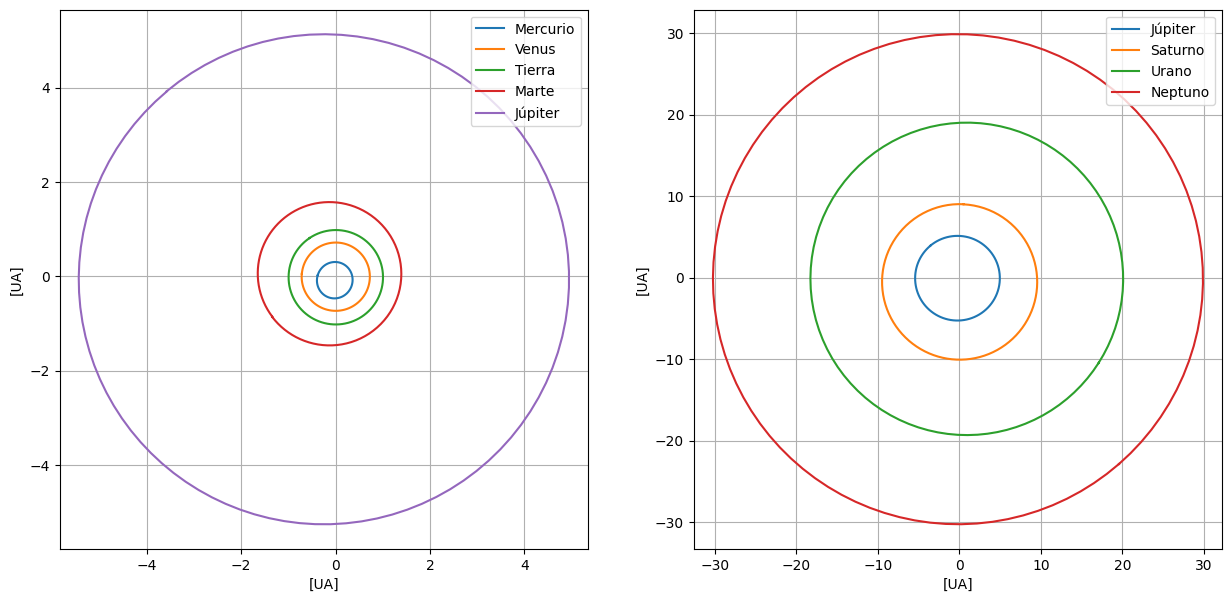

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

for i in range(5):
  axs[0].plot(posiciones_planetas[planetas[i]][0], posiciones_planetas[planetas[i]][1],label=planetas[i])

axs[0].legend()
axs[0].grid()
axs[0].set_xlabel('[UA]')
axs[0].set_ylabel('[UA]')
axs[0].axis('equal')

for i in range(4, 8):
  axs[1].plot(posiciones_planetas[planetas[i]][0], posiciones_planetas[planetas[i]][1], label=planetas[i])

axs[1].legend()
axs[1].grid()
axs[1].set_xlabel('[UA]')
axs[1].set_ylabel('[UA]')
axs[1].axis('equal')
;

##4. Calcule para cada planeta, en el punto inicial (fecha de su cumpleaños) la fuerza ejercida por el Sol sobre cada uno de los cuerpos. Compárelas.

Comenzamos por calcular las coordenadas del punto inicial para cada uno de los planetas en la fecha de mi cumpleaños.Estos corresponden a los primeros elementos que podemos obtener de posiciones_planetas.



In [16]:
posiciones_cumpleaños=[
    list(zip(posiciones_planetas[planetas[i]][0], posiciones_planetas[planetas[i]][1], posiciones_planetas[planetas[i]][2]))[0] for i in range(8)
    ]
posiciones_cumpleaños

[(-0.3771928527374998, 0.02413123962470021, 0.03711177136314089),
 (-0.7147004700502931, 0.05316635777334681, 0.04213135425464656),
 (-0.5501622504503411, 0.8105511097034319, -8.90663928390809e-06),
 (-1.340360814016516, -0.8621845891597021, 0.01500488171415462),
 (-3.57562355526767, 3.91871107568931, 0.0637579504716565),
 (0.4789459882270364, 9.015194405565573, -0.1759149442482189),
 (17.06916302399214, -10.45844408184849, -0.2600143843136596),
 (19.57661719690551, -22.84919472445441, 0.01937218781827853)]

In [17]:
np.array(posiciones_cumpleaños)

array([[-3.77192853e-01,  2.41312396e-02,  3.71117714e-02],
       [-7.14700470e-01,  5.31663578e-02,  4.21313543e-02],
       [-5.50162250e-01,  8.10551110e-01, -8.90663928e-06],
       [-1.34036081e+00, -8.62184589e-01,  1.50048817e-02],
       [-3.57562356e+00,  3.91871108e+00,  6.37579505e-02],
       [ 4.78945988e-01,  9.01519441e+00, -1.75914944e-01],
       [ 1.70691630e+01, -1.04584441e+01, -2.60014384e-01],
       [ 1.95766172e+01, -2.28491947e+01,  1.93721878e-02]])

Como los resultados que obtuvimos de astroquery estaban en unidades astronómicas, convertimos a metros para ser consistentes con el SI

In [18]:
r_vecs= np.array(posiciones_cumpleaños) * 1.5e11

Recordamos un elemento que usaremos en la sig. linea de codigo

In [19]:
masas_kg, planetas

({'Mercurio': 3.30098736946197e+23,
  'Venus': 4.867305814842006e+24,
  'Tierra': 5.972168398724899e+24,
  'Marte': 6.416908682663215e+23,
  'Júpiter': 1.8981246710786271e+27,
  'Saturno': 5.683173890692994e+26,
  'Urano': 8.680987253013814e+25,
  'Neptuno': 1.0240923396370666e+26,
  'Plutón': 1.302928873081634e+22},
 ['Mercurio',
  'Venus',
  'Tierra',
  'Marte',
  'Júpiter',
  'Saturno',
  'Urano',
  'Neptuno',
  'Plutón'])

In [20]:
def F_PS(r_vec, masa_pl):
  norma_F= pc.constantes.G * M_planeta('10') * masa_pl / np.linalg.norm(r_vec)**2
  F_vec = pc.constantes.G * M_planeta('10') * masa_pl * r_vec / np.linalg.norm(r_vec)**3
  return norma_F, F_vec

F_ps= [F_PS(r_vecs[i], masas_kg[planetas[i]])[0] for i in range(8)]
F_vecs= [F_PS(r_vecs[i], masas_kg[planetas[i]])[1] for i in range(8)]

A continuación se expresa la fuerza que siente cada uno de los planetas debido a la presencia del Sol en la fecha de mi cumpleaños. (expresado en N)

In [21]:
F_Ps_N= dict(zip(planetas, F_ps))
F_Ps_N

{'Mercurio': 1.349911151089823e+22,
 'Venus': 5.57024915307196e+22,
 'Tierra': 3.670612311667823e+22,
 'Marte': 1.4900294026345885e+21,
 'Júpiter': 3.977825473704492e+23,
 'Saturno': 4.111316987516139e+22,
 'Urano': 1.2775187581132706e+21,
 'Neptuno': 6.672081063764279e+20}

Vamos a mencionar en orden descendente los planetas que sienten una mayor fuerza debido a la presencia del Sol, y una pequeña interpretación de esto.

Observamos que Júpiter es el planeta que mas fuerza siente debido a la presencia del Sol, lo cual se entiende debido a que es el que tiene una mayor masa.

A continuación, venus, saturno, tierra y mercurio; Saturno por su masa y los demás, si bien no son tan masivos como saturno, jupiter o neptuno se encuentran mas cerca al sol, y el factor $r^2$ en el denominador contribuye a que F sea mayor.

Marte y Urano son los siguientes. El primero es mas cercano y el segundo más masivo.

Finalmente, neptuno.A pesar de ser muy masivo, es el mas lejano.

##5. Calcule, para ese mismo día, la fuerza total ejercida por todos los planetas sobre el Sol (suma).

Teniendo en cuenta que la fuerza que experimenta el sol debido a cada uno de los planetas es de igual magnitud y en sentido contrario a la que experimentan cada uno de los planetas debido al sol, sumamos las fuerzas que obtuvimos en F_vecs (de manera vectorial)

In [22]:
F_vecs

[array([-1.34070967e+22,  8.57730632e+20,  1.31911595e+21]),
 array([-5.54532654e+22,  4.12515210e+21,  3.26895149e+21]),
 array([-2.06142711e+22,  3.03708956e+22, -3.33726780e+17]),
 array([-1.25310220e+21, -8.06055649e+20,  1.40280513e+19]),
 array([-2.68097924e+23,  2.93822403e+23,  4.78052958e+21]),
 array([ 2.18071019e+21,  4.10474810e+22, -8.00966125e+20]),
 array([ 1.08921606e+21, -6.67373396e+20, -1.65920171e+19]),
 array([ 4.34105715e+20, -5.06674157e+20,  4.29572554e+17])]

Realizamos la suma vectorial de las fuerzas

In [23]:
F_total = np.zeros(3)

for i in F_vecs:
  F_total += i

In [24]:
F_total

array([-3.55121628e+23,  3.68243559e+23,  8.56516278e+21])

Calculamos la norma del vector F_total

In [25]:
print(f'La fuerza total que experimenta el Sol debido a la presencia de los planetas de de {np.linalg.norm(F_total)} N')

La fuerza total que experimenta el Sol debido a la presencia de los planetas de de 5.11652275802051e+23 N
